In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

C:\Users\Mukul\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.preprocessing import StandardScaler

In [16]:
import datetime as dt

In [18]:
import scipy

In [14]:
df = pd.read_csv("../Excel/OnlineRetail.csv", sep = ',', encoding="ISO-8859-1", header=0)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [21]:
df.shape

(541909, 8)

In [23]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
df.isnull().sum()[2]/df.shape[0]*100

0.2683107311375157

In [32]:
df.isnull().sum()[6]/df.shape[0]*100

24.926694334288598

In [33]:
df = df.dropna()

In [35]:
df.shape

(406829, 8)

In [37]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
df['CustomerID'] = df['CustomerID'].astype(str)

C:\Users\Mukul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [41]:
#Calculating Monetary Attribute
df['Amount'] = df['Quantity']*df['UnitPrice']

C:\Users\Mukul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
rfm_m = df.groupby('CustomerID')['Amount'].sum()

In [46]:
rfm_m = rfm_m.reset_index()

In [54]:
# #Calculating Frequency
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()

In [56]:
rfm_f = rfm_f.reset_index()

In [58]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')

In [67]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format= '%d-%m-%Y %H:%M')

C:\Users\Mukul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
max_date = max(df['InvoiceDate'])

In [76]:
df['diff'] = max_date - df['InvoiceDate']

C:\Users\Mukul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
#Calculating Recency
rfm_r = df.groupby('CustomerID')['diff'].min()

In [80]:
rfm_r = rfm_r.reset_index()

In [82]:
rfm_r['diff'] = rfm_r['diff'].dt.days

In [85]:
rfm = pd.merge(rfm, rfm_r, on='CustomerID', how = 'inner')

In [87]:
rfm.head()

,CustomerID,Amount,InvoiceNo,diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [88]:
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

In [91]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [117]:
rfm['Frequency'].describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

In [127]:
from scipy.stats import skew, kurtosis

In [141]:
#Checking for Skewness & Kurtosis
print("Skewness of Amount: {}".format(skew(rfm['Amount'])))
print("Kurtosis of Amount: {}".format(kurtosis(rfm['Amount'])))
print("--------------------------------------------------")
print("Skewness of Frequency: {}".format(skew(rfm['Frequency'])))
print("Kurtosis of Frequency: {}".format(kurtosis(rfm['Frequency'])))
print("--------------------------------------------------")
print("Skewness of Recency: {}".format(skew(rfm['Recency'])))
print("Kurtosis of Recency: {}".format(kurtosis(rfm['Recency'])))

Skewness of Amount: 21.69783928687044
Kurtosis of Amount: 606.4550309897861
--------------------------------------------------
Skewness of Frequency: 18.147505951700815
Kurtosis of Frequency: 485.6690382511969
---------------------------------------------------
Skewness of Recency: 1.2492366479193797
Kurtosis of Recency: 0.42839105594534654


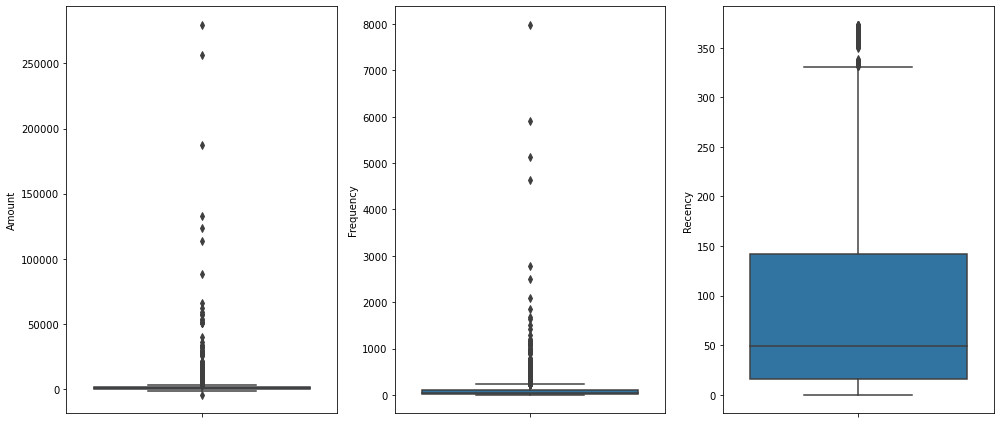

In [115]:
fig, ax = plt.subplots(1,3, figsize=(14,6))
sns.boxplot(rfm['Amount'], orient = 'v', ax = ax[0])
sns.boxplot(rfm['Frequency'], orient = 'v', ax = ax[1])
sns.boxplot(rfm['Recency'], orient = 'v', ax = ax[2])
plt.tight_layout()

In [144]:
#removing statistical outliers
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3-Q1
rfm = rfm[(rfm.Amount >= Q1 -1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

In [146]:
#removing statistical outliers
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3-Q1
rfm = rfm[(rfm.Recency >= Q1 -1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

In [148]:
#removing statistical outliers
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3-Q1
rfm = rfm[(rfm.Frequency >= Q1 -1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

In [152]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,4293.0,1270.411464,1755.551155,-4287.63,289.36,632.97,1518.43,13677.59
Frequency,4293.0,77.483578,100.270448,1.00,17.00,40.00,97.00,718.00
Recency,4293.0,92.548567,101.006845,0.00,17.00,50.00,145.00,373.00


In [157]:
se = StandardScaler()

In [158]:
rfm_df_scale = se.fit_transform(rfm_df)

In [166]:
rfm_new = pd.DataFrame(rfm_df_scale, columns = ['Amount', 'Frequency', 'Recency'])

In [167]:
rfm_new

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


In [168]:
no_f_clusters = range(2,11)

In [175]:
clust_inertia = []

In [176]:
for i in no_f_clusters:
    k_algo = KMeans(n_clusters = i, init = 'k-means++', random_state = 0).fit(rfm_new)
    clust_inertia.append(k_algo.inertia_)

Text(3.2, 4500, '3 Clusters')

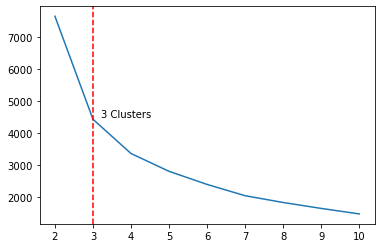

In [251]:
plt.plot(no_f_clusters, clust_inertia)
plt.axvline(x = 3, linestyle = '--', color = 'r')
plt.text(3.2, 4500, "3 Clusters")

In [178]:
kmean = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit(rfm_new)

In [180]:
labels = kmean.labels_

In [183]:
rfm_new.loc[:,'label'] = labels

In [184]:
rfm_new

,Amount,Frequency,Recency,label
0,-0.723738,-0.752888,2.301611,0
1,1.731617,1.042467,-0.906466,2
2,0.300128,-0.463636,-0.183658,1
3,0.277517,-0.044720,-0.738141,1
4,-0.533235,-0.603275,2.143188,0
...,...,...,...,...
4288,-0.624669,-0.683068,-0.193560,1
4289,-0.620853,-0.673094,1.826341,0
4290,-0.677696,-0.703017,0.865898,0
4291,-0.623131,-0.643171,-0.847057,1


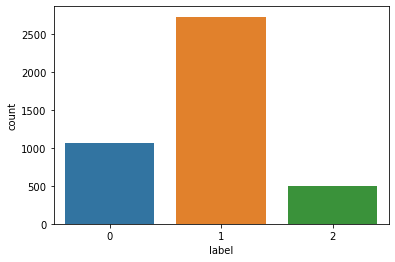

In [186]:
sns.countplot('label', data = rfm_new)

In [195]:
gk = rfm_new.groupby(by = 'label')

In [215]:
print(gk.get_group(0).count())
print("----------------------")
print(gk.get_group(1).count())
print("----------------------")
print(gk.get_group(2).count())

Amount       1068
Frequency    1068
Recency      1068
dtype: int64
----------------------
Amount       2726
Frequency    2726
Recency      2726
dtype: int64
----------------------
Amount       499
Frequency    499
Recency      499
dtype: int64


In [222]:
px.scatter_3d(rfm_new, x = 'Amount', y = 'Frequency', z = 'Recency', color = 'label')

In [227]:
rfm_new

,Amount,Frequency,Recency,label
0,-0.723738,-0.752888,2.301611,0
1,1.731617,1.042467,-0.906466,2
2,0.300128,-0.463636,-0.183658,1
3,0.277517,-0.044720,-0.738141,1
4,-0.533235,-0.603275,2.143188,0
...,...,...,...,...
4288,-0.624669,-0.683068,-0.193560,1
4289,-0.620853,-0.673094,1.826341,0
4290,-0.677696,-0.703017,0.865898,0
4291,-0.623131,-0.643171,-0.847057,1


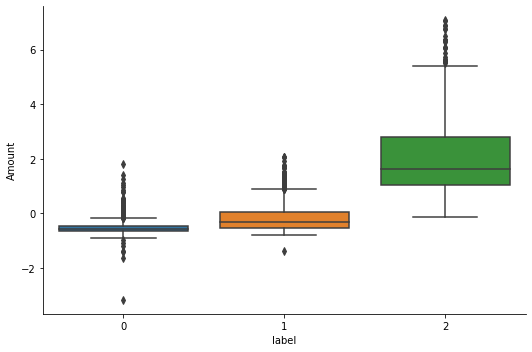

In [243]:
sns.catplot(x = 'label', y = 'Amount', data = rfm_new, kind = 'box', height = 5, aspect = 1.5)

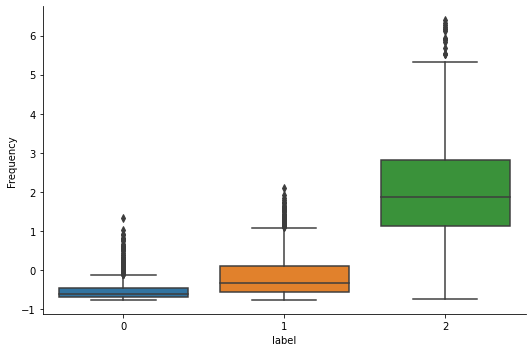

In [245]:
sns.catplot(x = 'label', y = 'Frequency', data = rfm_new, kind = 'box', height = 5, aspect = 1.5)

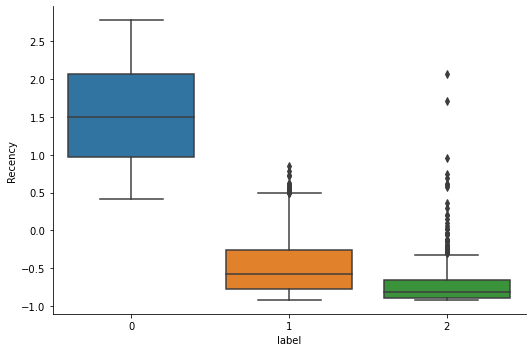

In [244]:
sns.catplot(x = 'label', y = 'Recency', data = rfm_new, kind = 'box', height = 5, aspect = 1.5)

Hence we can say that the customers which come under cluster 2 are of high importance as compared to other 2. So the company should focus on such type of customers if we talk about spending.